In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('international-airline-passengers.csv', usecols = [1])
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [3]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [5]:
# keeping 2/3rd data as training data and 1/3rd data as testing data
train_size = int(values.shape[0] * 0.67)
test_size = values.shape[0] - train_size

train = values[0:train_size]
test = values[train_size:]

train.shape, test.shape

((96, 1), (48, 1))

In [6]:
scaler = MinMaxScaler(feature_range = (0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [7]:
def create_dataset(data, k):
    dataX, dataY = [], []
    for i in range(data.shape[0] - k):
        x = data[i:i+k, 0]
        y = data[i+k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [8]:
look_back = 12
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [9]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_train.shape, x_test.shape

((84, 12, 1), (36, 12, 1))

In [12]:
model = Sequential()

model.add(GRU(128, input_shape=(look_back, 1))) # input_shape = look_back, num_of_features
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=1)

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0256
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0135
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0104
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0070
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0092
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0054
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0058
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0068
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0047
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0066


In [13]:
test_pred = model.predict(x_test)
test_pred = scaler.inverse_transform(test_pred).ravel()

train_pred = model.predict(x_train)
train_pred = scaler.inverse_transform(train_pred).ravel()

test_true = scaler.inverse_transform([y_test]).ravel()
train_true = scaler.inverse_transform([y_train]).ravel()

test_pred.shape, test_true.shape

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


((36,), (36,))

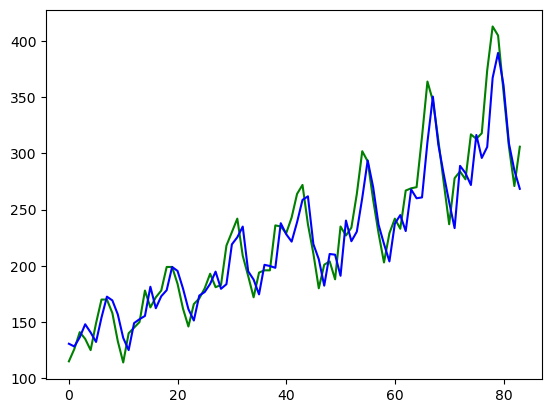

In [14]:
import matplotlib.pyplot as plt
plt.plot(train_true, c = 'g')
plt.plot(train_pred, c = 'b')
plt.show()

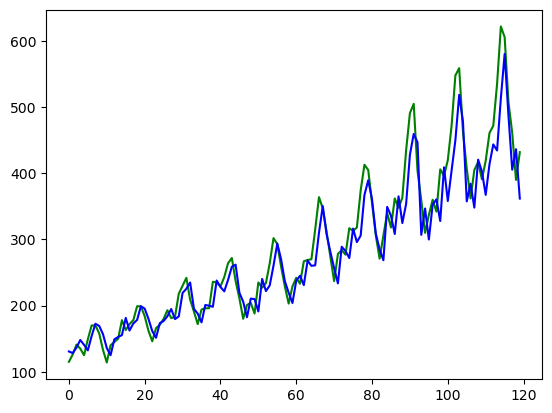

In [15]:
# combined plot for train and test predicted
combined_predicted = np.concatenate((train_pred, test_pred))
combined_true = np.concatenate((train_true, test_true))
plt.plot(combined_true, c = 'g')
plt.plot(combined_predicted, c = 'b')
plt.show()

In [16]:
r2_score(combined_true, combined_predicted)

0.9163900889625354